In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Import the data

Question 1: How many ".csv" files are available in the dataset?

In [5]:
link_data = pd.read_csv("links.csv")
link_data.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [6]:
movies_data = pd.read_csv("movies.csv")
movies_data.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [7]:
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [8]:
tags_data = pd.read_csv("tags.csv")
tags_data.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


Question 2: What is the shape of "movies.csv"?

In [9]:
movies_data.shape

(9742, 3)

In [10]:
print("No of rows in the movies dataset:",movies_data.shape[0])
print("No of columns in the movies dataset:",movies_data.shape[1])

No of rows in the movies dataset: 9742
No of columns in the movies dataset: 3


Question 3: What is the shape of "ratings.csv"?

In [11]:
ratings_data.shape

(100836, 4)

In [12]:
print("No of rows in the ratings dataset:",ratings_data.shape[0])
print("No of columns in the ratings dataset:",ratings_data.shape[1])

No of rows in the ratings dataset: 100836
No of columns in the ratings dataset: 4


Question 4: How many unique "userId" are available in "ratings.csv"?

In [13]:
ratings_data['userId'].nunique()

610

Question 5: Which movie has recieved maximum number of user ratings?

In [14]:
ratings_counts = ratings_data.groupby('movieId')['movieId'].count().sort_values(ascending = False)
max_rated_movieid = ratings_counts.idxmax()
max_rated_movietitle = movies_data[movies_data['movieId']==max_rated_movieid]['title'].values[0]
print("Movie Id with maximum number of ratings:",max_rated_movieid)
print("Movie title with maximum number of ratings:",max_rated_movietitle)

Movie Id with maximum number of ratings: 356
Movie title with maximum number of ratings: Forrest Gump (1994)


Question 6: Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [15]:
matrix_movie_id = movies_data[movies_data['title'] == 'Matrix, The (1999)']['movieId'].values[0]
unique_tags = tags_data[tags_data['movieId'] == matrix_movie_id]['tag'].unique()
print("Tags for Matrix, The (1999): ",unique_tags)


Tags for Matrix, The (1999):  ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


Question 7: What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
termi_movie_id = movies_data[movies_data['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
avg_rating = ratings_data[ratings_data['movieId'] == termi_movie_id]['rating'].mean()
print("Average movie rating for Terminator 2: Judgment Day (1991):",round(avg_rating,2))

Average movie rating for Terminator 2: Judgment Day (1991): 3.97


Question 8: How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

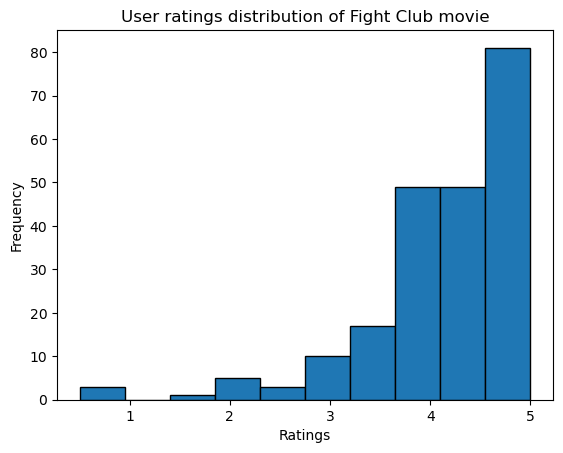

In [17]:
fightclub_id = movies_data[movies_data['title'] == 'Fight Club (1999)']['movieId'].values[0]
fightclub_ratings = ratings_data[ratings_data['movieId'] == fightclub_id]['rating']
plt.hist(fightclub_ratings,bins = 10,edgecolor = 'black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('User ratings distribution of Fight Club movie')
plt.show()

#Data is concentrated on right side and the tail is longer in left side.so it is left skewed.

In [18]:
grouped_rating = ratings_data.groupby('movieId')['rating'].agg(['count','mean']).reset_index()
movie_rating = movies_data.merge(grouped_rating,on = 'movieId',how = 'inner')
filtered_data = movie_rating[movie_rating['count'] > 50]
filtered_data.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


Question 9: Which movie is the most popular based on  average user ratings?

In [19]:
max_avg_rating = filtered_data['mean'].max()

In [20]:
pop_movie = filtered_data[filtered_data['mean'] == max_avg_rating]
print("Most popular movie based on user rating:",pop_movie['title'].iloc[0])
print("Average rating:",round(max_avg_rating,2))

Most popular movie based on user rating: Shawshank Redemption, The (1994)
Average rating: 4.43


Question 10: Top 5 popular movies based on number of user ratings

In [21]:
top_5_movies = filtered_data.sort_values(by = 'count',ascending = False).head()
print("Top 5 popular movies")
print(top_5_movies[['title','count']])

Top 5 popular movies
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


Question 11: Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [22]:
scifi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]
pop_scifi_movie = scifi_movies.sort_values(by = 'count',ascending = False).iloc[2]
print("Third most popular movie based on user ratings:",pop_scifi_movie['title'])
print("Number of user ratings:",pop_scifi_movie['count'])

Third most popular movie based on user ratings: Jurassic Park (1993)
Number of user ratings: 238


In [23]:
merged_data = filtered_data.merge(link_data,on = 'movieId',how = 'inner')
merged_data.head(5)

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [24]:
import requests
import numpy as np
from bs4 import BeautifulSoup


In [25]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'itemprop' : 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan
    

In [27]:
rating = []
for i in merged_data['imdbId']:
    rating.append(scrapper(i))
merged_data['imdb_rating'] = rating

KeyboardInterrupt: 

Question 12: Mention the movieId of the movie which has the highest IMDB rating.

In [30]:
#not completed the web scraping.

Question 13: Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [33]:
scifi_movies.sort_values(by = 'mean',ascending = False).head(1)


,movieId,title,genres,count,mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
